<a href="https://colab.research.google.com/github/FatoniRahmat/Data-Analyst-in-Python/blob/main/TheLook_Ecommerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setup Environment & Run Packages

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#current version of seaborn generates a bunch of warnings that we'll ignore
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

#missing data visualization module for Python
import missingno as msno
import gc
import datetime

%matplotlib inline
color = sns.color_palette()

#Load Data

In [26]:
#Import dataset
sheet_url = 'https://docs.google.com/spreadsheets/d/1iBe8jff5BGEPhs4l5T8RNlJQwx-EGLNMaPu9IGrYVnc/edit#gid=1372867123'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df = pd.read_csv(sheet_url_trf)
pd.set_option('display.max_columns', None)
df.head(2)

,id,first_name,last_name,age,gender,state,city,country,created_at,order_id,created_at_1,num_of_item,product_id,status,created_at_2,shipped_at,delivered_at,returned_at,sale_price,cost,category,name,brand,department
0,95496,Kristen,Murillo,21,F,Sichuan,Jilin,China,2021-06-04 18:41:00 UTC,119213,2022-12-31 18:41:00 UTC,1,13942,Shipped,2022-12-31 16:54:43 UTC,2023-01-01 21:25:00 UTC,NaN,NaN,39.99,14.356,Accessories,Osgoode Marley Eight Hook Zip Key Case with Valet,Osgoode Marley,Women
1,72456,Stacey,Thomas,63,F,Florida,Tallahassee,United States,2022-09-13 18:41:00 UTC,90327,2022-12-31 18:41:00 UTC,1,4478,Processing,2022-12-31 16:27:43 UTC,NaN,NaN,NaN,61.90,36.521,Jeans,KUT from the Kloth Women's Natalie Bootcut,KUT from the Kloth,Women


#Basic steps
1.Check Variable Names

2.Check Data Type

3.Handle Missing Values

4.Check Duplicate Records

##1. Check Variable Names
Column names provide a clear identification of the data contained within each column. By reviewing the column names, i can quickly understand the type of information stored in each column. This helps me make sense of the data and interpret it correctly.


In [27]:
#Check columns
df.columns

Index(['id', 'first_name', 'last_name', 'age', 'gender', 'state', 'city',
       'country', 'created_at', 'order_id', 'created_at_1', 'num_of_item',
       'product_id', 'status', 'created_at_2', 'shipped_at', 'delivered_at',
       'returned_at', 'sale_price', 'cost', 'category', 'name', 'brand',
       'department'],
      dtype='object')

Now, we change name of the columns:

In [28]:
#Rename columns
df = df.rename(columns={'id': 'user_id', 'created_at': 'user_created_at', 'created_at_1': 'order_created_at',
                     'created_at_2': 'product_created_at', 'shipped_at': 'product_shipped_at',
                     'delivered_at': 'product_delivered_at', 'returned_at': 'product_returned_at'})

Now, we change the order of the columns:

In [29]:
#Change the column order
col_order = ['user_id', 'first_name', 'last_name', 'age', 'gender', 'state', 'city',
             'country', 'user_created_at', 'order_id', 'order_created_at', 'num_of_item',
             'product_id', 'name', 'brand', 'category', 'department', 'sale_price',
             'cost', 'product_created_at', 'product_shipped_at', 'product_delivered_at',
             'product_returned_at', 'status']
df = df[col_order]
pd.set_option('display.max_columns', None)
df.head(2)

,user_id,first_name,last_name,age,gender,state,city,country,user_created_at,order_id,order_created_at,num_of_item,product_id,name,brand,category,department,sale_price,cost,product_created_at,product_shipped_at,product_delivered_at,product_returned_at,status
0,95496,Kristen,Murillo,21,F,Sichuan,Jilin,China,2021-06-04 18:41:00 UTC,119213,2022-12-31 18:41:00 UTC,1,13942,Osgoode Marley Eight Hook Zip Key Case with Valet,Osgoode Marley,Accessories,Women,39.99,14.356,2022-12-31 16:54:43 UTC,2023-01-01 21:25:00 UTC,NaN,NaN,Shipped
1,72456,Stacey,Thomas,63,F,Florida,Tallahassee,United States,2022-09-13 18:41:00 UTC,90327,2022-12-31 18:41:00 UTC,1,4478,KUT from the Kloth Women's Natalie Bootcut,KUT from the Kloth,Jeans,Women,61.90,36.521,2022-12-31 16:27:43 UTC,NaN,NaN,NaN,Processing


##2. Check Data Type
Checking the data types is an important step in data cleaning because it helps ensure the consistency, accuracy, and reliability of the data.

In [30]:
#Check data type
df.dtypes

user_id                   int64
first_name               object
last_name                object
age                       int64
gender                   object
state                    object
city                     object
country                  object
user_created_at          object
order_id                  int64
order_created_at         object
num_of_item               int64
product_id                int64
name                     object
brand                    object
category                 object
department               object
sale_price              float64
cost                    float64
product_created_at       object
product_shipped_at       object
product_delivered_at     object
product_returned_at      object
status                   object
dtype: object

Based on data documentation, we must check whether the data type of variables is correct or not. The result shows, there is something wrong about user_id, age, user_created_at, order_id, order_created_at, product_id, product_created_at, product_shipped_at, product_delivered_at, product_returned_at.

In [31]:
#Change data type
df['user_created_at'] = pd.to_datetime(df.user_created_at).dt.tz_localize(None)
df['order_created_at'] = pd.to_datetime(df.order_created_at).dt.tz_localize(None)
df['product_created_at'] = pd.to_datetime(df.product_created_at).dt.tz_localize(None)
df['product_shipped_at'] = pd.to_datetime(df.product_shipped_at).dt.tz_localize(None)
df['product_delivered_at'] = pd.to_datetime(df.product_delivered_at).dt.tz_localize(None)
df['product_returned_at'] = pd.to_datetime(df.product_returned_at).dt.tz_localize(None)
df['user_id'] = df['user_id'].astype('object')
df['age'] = df['age'].astype('object')
df['order_id'] = df['order_id'].astype('object')
df['product_id'] = df['product_id'].astype('object')
df.dtypes

user_id                         object
first_name                      object
last_name                       object
age                             object
gender                          object
state                           object
city                            object
country                         object
user_created_at         datetime64[ns]
order_id                        object
order_created_at        datetime64[ns]
num_of_item                      int64
product_id                      object
name                            object
brand                           object
category                        object
department                      object
sale_price                     float64
cost                           float64
product_created_at      datetime64[ns]
product_shipped_at      datetime64[ns]
product_delivered_at    datetime64[ns]
product_returned_at     datetime64[ns]
status                          object
dtype: object

##3. Handle Missing Values
Checking for missing values is an important step in data cleaning because missing values can have a significant impact on the quality and reliability of the data analysis. Missing values can lead to incomplete or inaccurate data, which can skew the analysis and produce misleading results. By identifying and handling missing values appropriately, me ensure the integrity and reliability of the data.

In [32]:
#Check the amount of missing values
def nulls(df):
    null_values = pd.DataFrame(df.isnull().sum())
    null_values[1] = null_values[0] / len(df)
    null_values.columns = ['count','%pct']
    filtered_null = null_values[null_values['%pct'] > 0].sort_values(by='%pct', ascending=False)
    return filtered_null
nulls(df)

,count,%pct
product_returned_at,55494,0.900935
product_delivered_at,39947,0.648532
product_shipped_at,21686,0.352068
city,608,0.009871
brand,56,0.000909
name,6,0.000097


From the results above, we know that the most missing values are the product_shipped_at, product_delivered_at, product_returned_at columns. Because the data is influenced by the status column, I chose to leave it alone. For missing data less than 5% I will drop rows.

In [33]:
#Remove missing values
df = df.dropna(subset = ['city', 'name', 'brand',])

##4. Check Duplicate Rows
Duplicate rows can compromise the integrity of the dataset. If we have multiple identical rows, it can lead to inaccurate statistical analysis, misleading results, and duplicate entries in downstream processes. By identifying and removing duplicate rows, we ensure that the data accurately represents the underlying information.

In [34]:
#Check for duplicate data
df.duplicated().sum()

0

So, they are not duplicated rows.

##Export the File
Export cleaned data.

In [35]:
#Export data
df.to_csv('Ecommerce_Dataset_Cleaned.csv')

#Exploratory Data Analysis (EDA)

##1. How many orders made by the customers?


In [37]:
#Create an order column
df.groupby(by=['user_id','country'], as_index=False)['order_id'].count().head()

,user_id,country,order_id
0,8,South Korea,2
1,9,France,1
2,11,China,4
3,14,China,1
4,22,United States,1


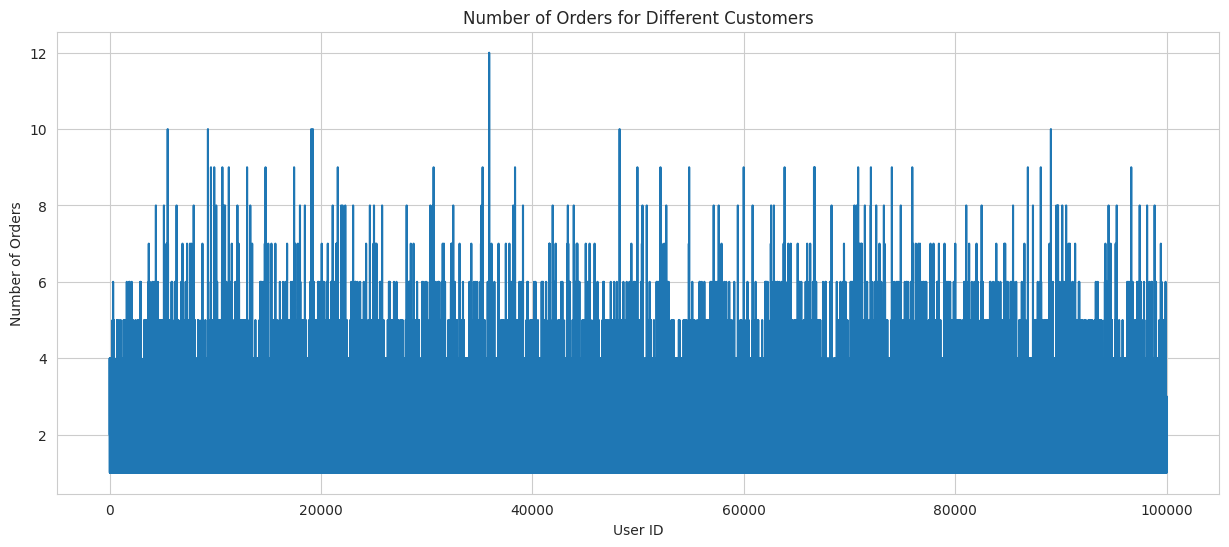

In [38]:
#Create order quantity graph
orders = df.groupby(by=['user_id','country'], as_index=False)['order_id'].count()

plt.subplots(figsize=(15,6))
plt.plot(orders.user_id, orders.order_id)
plt.xlabel('User ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for Different Customers')
plt.show()

### Check TOP 5 most number of orders

In [39]:
#Create a TOP 5 table
print('The TOP 5 customers with most number of orders...')
orders.sort_values(by='order_id', ascending=False).head()

The TOP 5 customers with most number of orders...


,user_id,country,order_id
11999,35906,United States,12
6392,19076,China,10
16146,48249,United Kingdom,10
1804,5492,France,10
3067,9299,China,10


##2. How much money spent by the customers?

In [40]:
#Add the column amount_spent
df['amount_spent'] = df['sale_price'] * df['num_of_item']

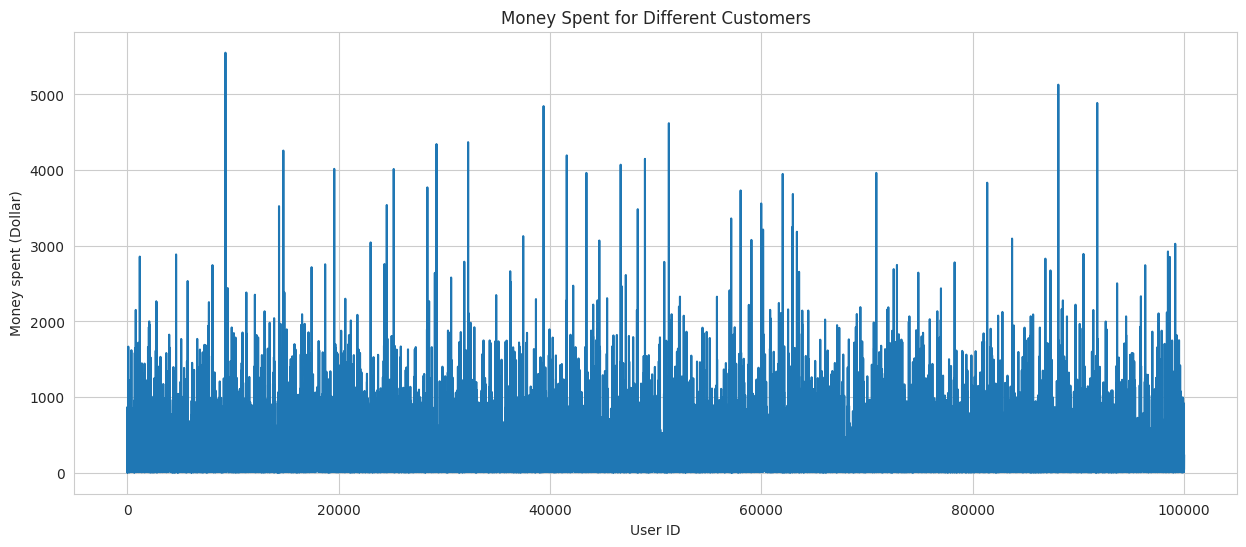

In [41]:
#Create money spent graph
money_spent = df.groupby(by=['user_id','country'], as_index=False)['amount_spent'].sum()

plt.subplots(figsize=(15,6))
plt.plot(money_spent.user_id, money_spent.amount_spent)
plt.xlabel('User ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent for Different Customers')
plt.show()

###Check TOP 5 highest money spent

In [42]:
#Create a TOP 5 table
print('The TOP 5 customers with highest money spent...')
money_spent.sort_values(by='amount_spent', ascending=False).head()

The TOP 5 customers with highest money spent...


,user_id,country,amount_spent
3067,9299,China,5551.53
29467,88098,China,5129.17
30693,91780,China,4887.60
13116,39399,Spain,4845.88
17127,51252,United States,4619.96


##3. Number of Orders

In [43]:
#Add the columns Month, Day and Hour for the order_created_at
df.insert(loc=11, column='year_month', value=df['order_created_at'].map(lambda x: 100*x.year + x.month))
df.insert(loc=12, column='month', value=df.order_created_at.dt.month)
#+1 to make Monday=1.....until Sunday=7
df.insert(loc=13, column='day', value=(df.order_created_at.dt.dayofweek)+1)
df.insert(loc=14, column='hour', value=df.order_created_at.dt.hour)

In [44]:
df.head(1)

,user_id,first_name,last_name,age,gender,state,city,country,user_created_at,order_id,order_created_at,year_month,month,day,hour,num_of_item,product_id,name,brand,category,department,sale_price,cost,product_created_at,product_shipped_at,product_delivered_at,product_returned_at,status,amount_spent
0,95496,Kristen,Murillo,21,F,Sichuan,Jilin,China,2021-06-04 18:41:00,119213,2022-12-31 18:41:00,202212,12,6,18,1,13942,Osgoode Marley Eight Hook Zip Key Case with Valet,Osgoode Marley,Accessories,Women,39.99,14.356,2022-12-31 16:54:43,2023-01-01 21:25:00,NaT,NaT,Shipped,39.99


###How many orders (per month)?

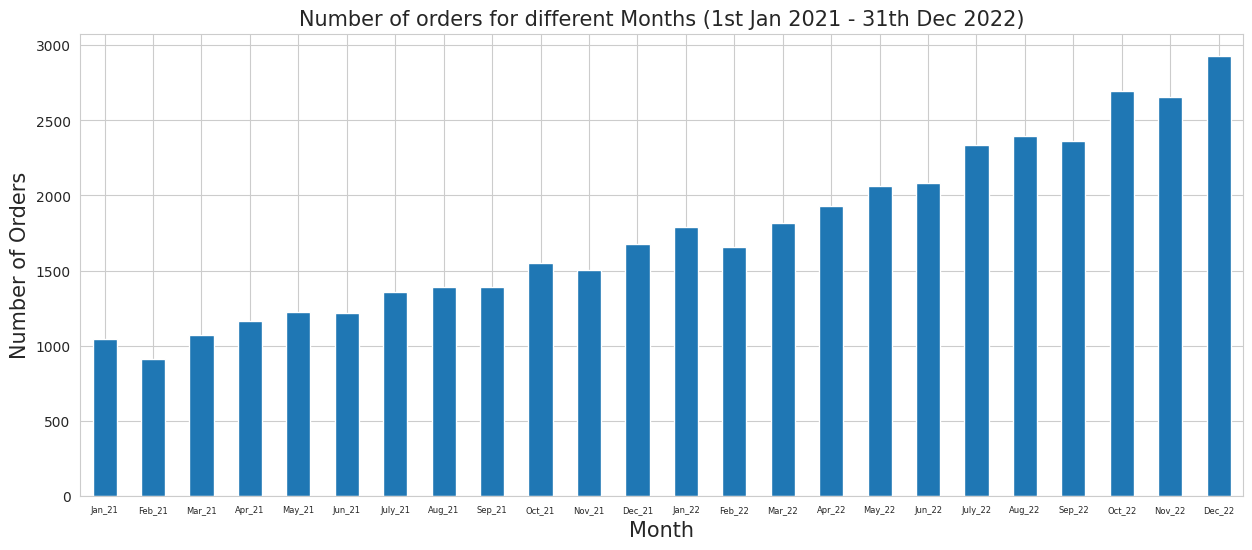

In [52]:
#Create orders per month graph
ax = df.groupby('order_id')['year_month'].unique().value_counts().sort_index().plot(kind='bar',color=color[0],figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Months (1st Jan 2021 - 31th Dec 2022)',fontsize=15)
ax.set_xticklabels(('Jan_21','Feb_21','Mar_21','Apr_21','May_21','Jun_21','July_21','Aug_21','Sep_21',
                    'Oct_21','Nov_21','Dec_21','Jan_22','Feb_22','Mar_22','Apr_22','May_22','Jun_22',
                    'July_22','Aug_22','Sep_22','Oct_22','Nov_22','Dec_22'), rotation='horizontal', fontsize=6)
plt.show()

###How many orders (per day)?

In [53]:
#Orders per day
df.groupby('order_id')['day'].unique().value_counts().sort_index()

[1]    5979
[2]    6036
[3]    6075
[4]    6026
[5]    6063
[6]    6020
[7]    6009
Name: day, dtype: int64

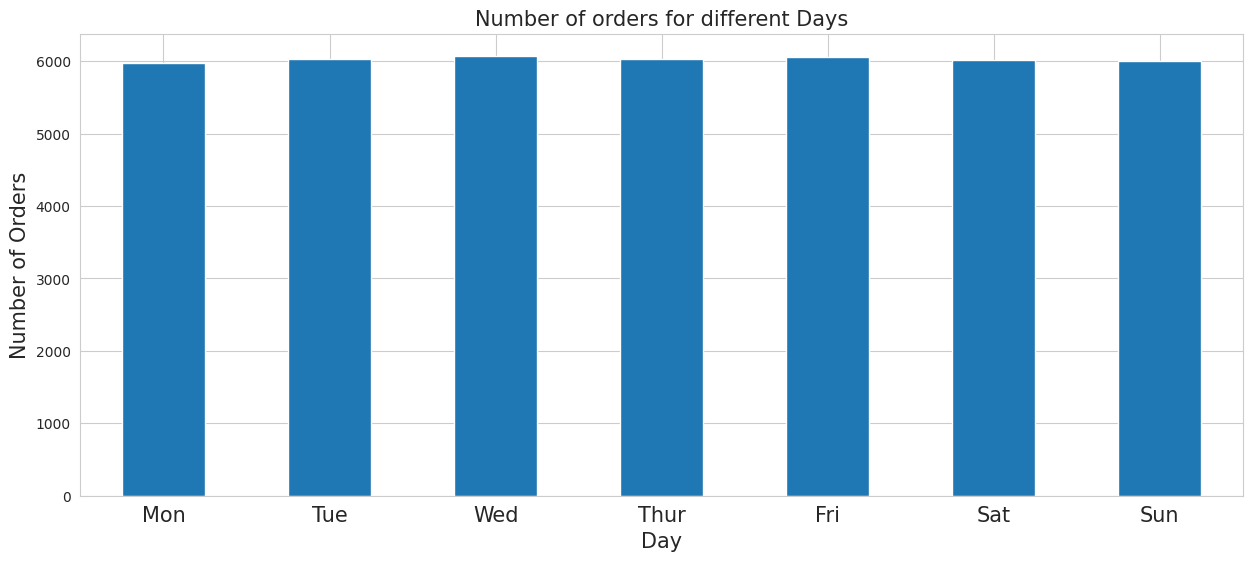

In [54]:
#Create orders per day graph
ax = df.groupby('order_id')['day'].unique().value_counts().sort_index().plot(kind='bar',color=color[0],figsize=(15,6))
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Days',fontsize=15)
ax.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sat','Sun'), rotation='horizontal', fontsize=15)
plt.show()

###How many orders (per hour)?

In [55]:
#Orders per hour
df.groupby('order_id')['hour'].unique().value_counts().iloc[:-1].sort_index()

[0]     2294
[1]     2346
[2]     2271
[3]     2194
[4]     2275
[5]     2168
[6]     2223
[7]     2221
[8]     2183
[9]     2215
[10]    2159
[11]    2169
[12]    2228
[14]    2320
[15]    2123
[16]    2217
[17]    2272
[18]    2228
Name: hour, dtype: int64

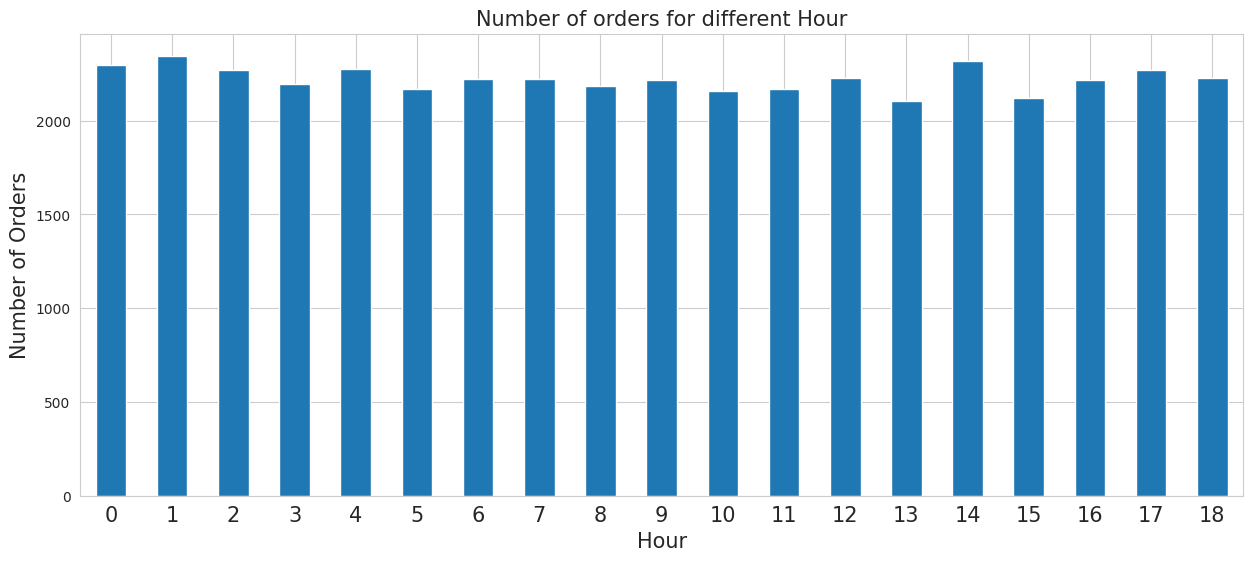

In [62]:
#Create orders per hour graph
ax = df.groupby('order_id')['hour'].unique().value_counts().sort_index().plot(kind='bar',color=color[0],figsize=(15,6))
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Hour',fontsize=15)
ax.set_xticklabels(('0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18'), rotation='horizontal', fontsize=15)
plt.show()

##4. Status Order

In [66]:
#Ordering based on purchase status
purchase_status=df.groupby('status')
purchase_status['status'].count()

status
Cancelled      9244
Complete      15384
Processing    12209
Returned       6029
Shipped       18061
Name: status, dtype: int64

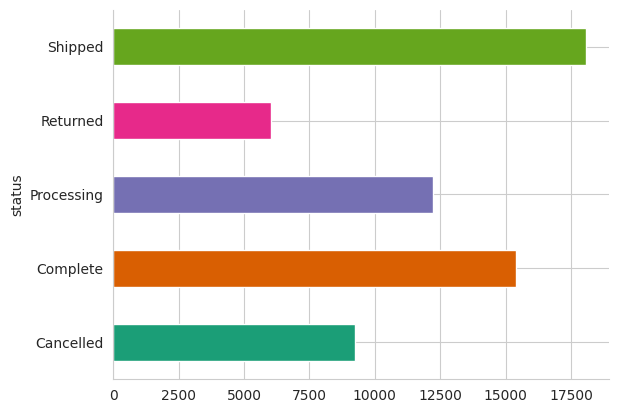

In [67]:
##Create purchase status graph
df.groupby('status')['order_id'].size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)